In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
plt.rcParams['figure.figsize'] = [17, 8]

In [2]:
import torch
from torch.utils.data import DataLoader

In [3]:
from dataset.audio_dataset import AudioData, default
from model.autoencoder.encoder import Encoder
from model.autoencoder.decoder import Decoder
from model.ddsp.harmonic_oscillator import OscillatorBank
from train.train import AutoEncoder

/home/kureta/.conda/envs/ddsp-pytorch/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [4]:
dataset = AudioData(clear=False)

Loading presaved dataset...


In [5]:
audio = dataset[0]
audio.shape

torch.Size([88064])

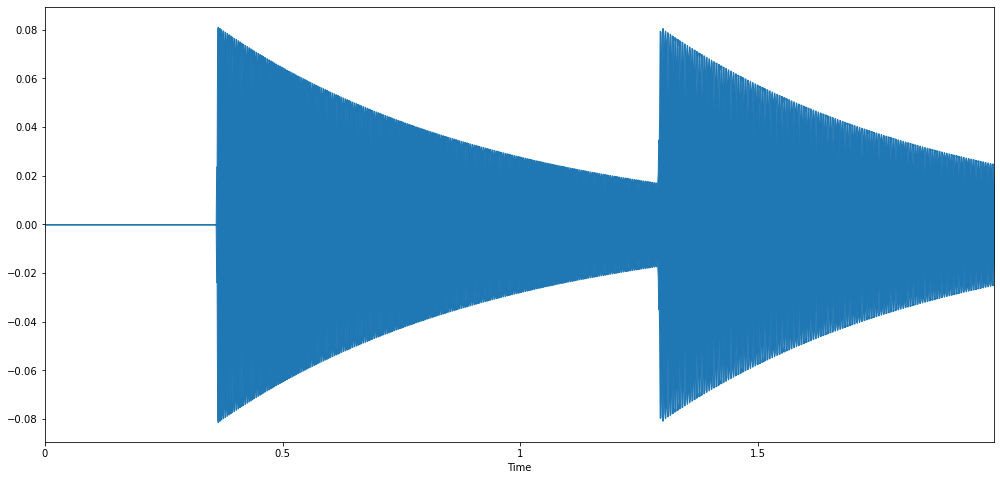

In [6]:
librosa.display.waveplot(audio.numpy(), sr=default.sample_rate)

In [7]:
loader = DataLoader(dataset, 10, shuffle=True)

In [8]:
for batch in loader:
    print(batch.shape)
    break

torch.Size([10, 88064])


In [9]:
encoder = Encoder()

In [10]:
z = encoder(batch)

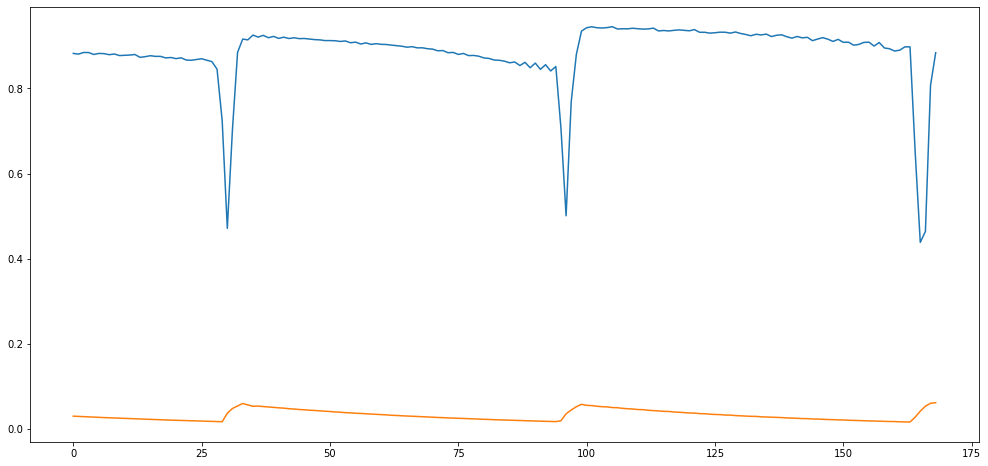

In [11]:
# plt.plot(z['f0'][0])
plt.plot(z['harmonicity'][0])
plt.plot(z['loudness'][0])

In [12]:
ae = AutoEncoder()

In [13]:
with torch.no_grad():
    result = ae(batch)

/home/kureta/Documents/repos/personal/ddsp-pytorch/model/autoencoder/decoder.py:149: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  c = F.softmax(self.dense_harmonic(latent))


In [14]:
result.shape

torch.Size([10, 88064])

In [15]:
batch.shape

torch.Size([10, 88064])

In [16]:
with torch.no_grad():
    z = encoder(result)

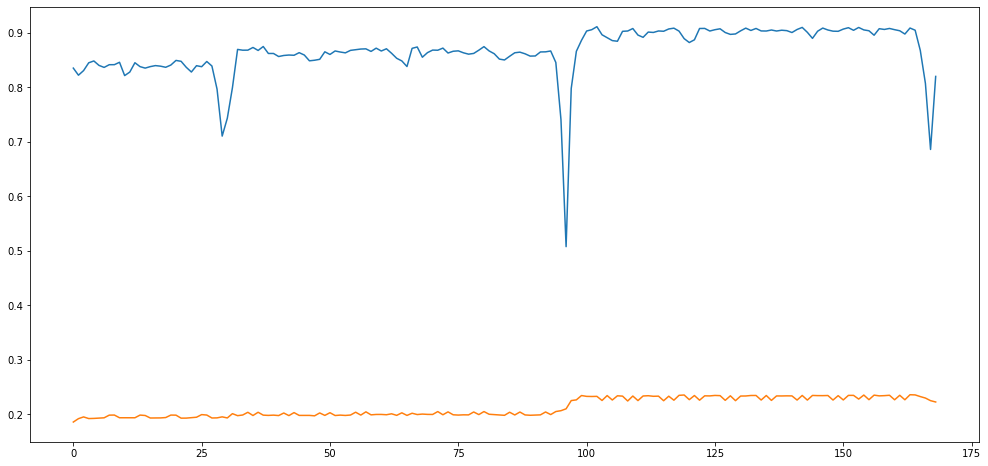

In [17]:
# plt.plot(z['f0'][0])
plt.plot(z['harmonicity'][0])
plt.plot(z['loudness'][0])